## Stock Price Prediction using Time Series

Time series forecasting, especially for stock prices, is a critical area of study in data analytics due to the complex patterns and trends present in financial data. My project leveraging Facebook Prophet, a powerful tool for forecasting, is an impressive undertaking.

Facebook Prophet is an open-source forecasting tool designed to handle time series data, accommodating seasonality, trends, and outliers effectively. It's particularly well-suited for scenarios where data may have missing values or abrupt changes—common in financial markets. The tool's intuitive nature and flexibility make it popular among data scientists for generating accurate predictions.

By applying Facebook Prophet to stock price forecasting, My project delves into predicting future price movements based on historical trends. Such projects typically involve data preprocessing, model configuration, parameter tuning, and performance evaluation to ensure accurate results. These forecasts can aid investors and analysts in making informed decisions, showcasing the real-world impact of my work.

# Yfinace

The yfinance library in Python is a popular tool for accessing financial data from Yahoo Finance. It allows users to fetch historical market data, financials, fundamentals, news, and even options chain data. This library is beginner-friendly and widely used for tasks like analyzing stock market trends, prototyping trading strategies, and building financial dashboards

# About Project





## Overview
This web application is built using the **Flask** framework to enable users to **select a company** from the **Nifty 50** stock list. Once a company is selected, the application processes historical stock data, performs **data preprocessing**, and then uses the **Prophet()** class from the **Prophet library** to forecast stock prices for the next **30 days**.

## Features
- **User-Friendly Interface:** A modern UI that allows users to seamlessly select a company.
- **Real-Time Data Processing:** Fetches and preprocesses historical stock data automatically.
- **Time Series Forecasting:** Utilizes Facebook's **Prophet model** for accurate stock price predictions.
- **Interactive Visualizations:** Displays the predicted trend with interactive charts.
- **Flask-Powered Backend:** Efficient data handling and model deployment using Flask.

## How It Works
1. **User Selection:** The user selects a company from a dropdown list of Nifty 50 stocks.
2. **Data Preprocessing:** The application fetches historical stock data from yfinance and prepares it for modeling.
3. **Model Training & Forecasting:** The **Prophet model** is trained on the data and predicts stock prices for the next 30 days.
4. **Results Display:** The forecasted prices are presented in a **visually appealing graph**.

## Technologies Used
- **Flask:** Backend framework to handle requests and responses.
- **Yahoo Finance API / NSE Data:** To fetch historical stock prices.
- **Pandas & NumPy:** For data preprocessing.
- **Prophet:** For time series forecasting.
- **Matplotlib :** To visualize stock trends.
- **CSS:** To enhance UI/UX design.

This application provides investors and traders with **AI-powered insights** into potential stock movements, aiding them in making **data-driven investment decisions**.


In [1]:
# importing required Libraries
 
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# using datetime module for fetching latest data

x = datetime.datetime.now()
x = x.strftime("%Y-%m-%d")

# Getting data from yfinace
nifty50 = yf.Ticker("RELIANCE.NS")
df = nifty50.history(start= '2010-01-01', end=x)

In [3]:
# printing data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00+05:30,207.436778,207.436778,194.271176,204.470947,76646086,0.0,0.0
2010-01-05 00:00:00+05:30,218.615702,218.615702,202.550793,203.558411,21392825,0.0,0.0
2010-01-06 00:00:00+05:30,205.307472,208.083191,203.548888,206.847427,23691760,0.0,0.0
2010-01-07 00:00:00+05:30,206.847417,211.980573,204.946237,210.279022,26197920,0.0,0.0
2010-01-08 00:00:00+05:30,210.649759,211.752445,208.368355,209.727692,15110149,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-25 00:00:00+05:30,1307.699951,1307.699951,1282.599976,1285.449951,13713899,0.0,0.0
2025-03-26 00:00:00+05:30,1291.000000,1293.800049,1268.750000,1273.050049,12074747,0.0,0.0
2025-03-27 00:00:00+05:30,1278.150024,1285.000000,1271.300049,1278.199951,15028056,0.0,0.0


## Data cleaning

In [4]:
df = df.reset_index()
df['Date'] = df["Date"].dt.date
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04,207.436778,207.436778,194.271176,204.470947,76646086,0.0,0.0
1,2010-01-05,218.615702,218.615702,202.550793,203.558411,21392825,0.0,0.0
2,2010-01-06,205.307472,208.083191,203.548888,206.847427,23691760,0.0,0.0
3,2010-01-07,206.847417,211.980573,204.946237,210.279022,26197920,0.0,0.0
4,2010-01-08,210.649759,211.752445,208.368355,209.727692,15110149,0.0,0.0
...,...,...,...,...,...,...,...,...
3758,2025-03-25,1307.699951,1307.699951,1282.599976,1285.449951,13713899,0.0,0.0
3759,2025-03-26,1291.000000,1293.800049,1268.750000,1273.050049,12074747,0.0,0.0
3760,2025-03-27,1278.150024,1285.000000,1271.300049,1278.199951,15028056,0.0,0.0
3761,2025-03-28,1280.000000,1295.750000,1269.000000,1275.099976,18147129,0.0,0.0


In [5]:
df = df[['Date',"Close"]]

In [6]:
df

,Date,Close
0,2010-01-04,204.470947
1,2010-01-05,203.558411
2,2010-01-06,206.847427
3,2010-01-07,210.279022
4,2010-01-08,209.727692
...,...,...
3758,2025-03-25,1285.449951
3759,2025-03-26,1273.050049
3760,2025-03-27,1278.199951
3761,2025-03-28,1275.099976


# Data Visualization

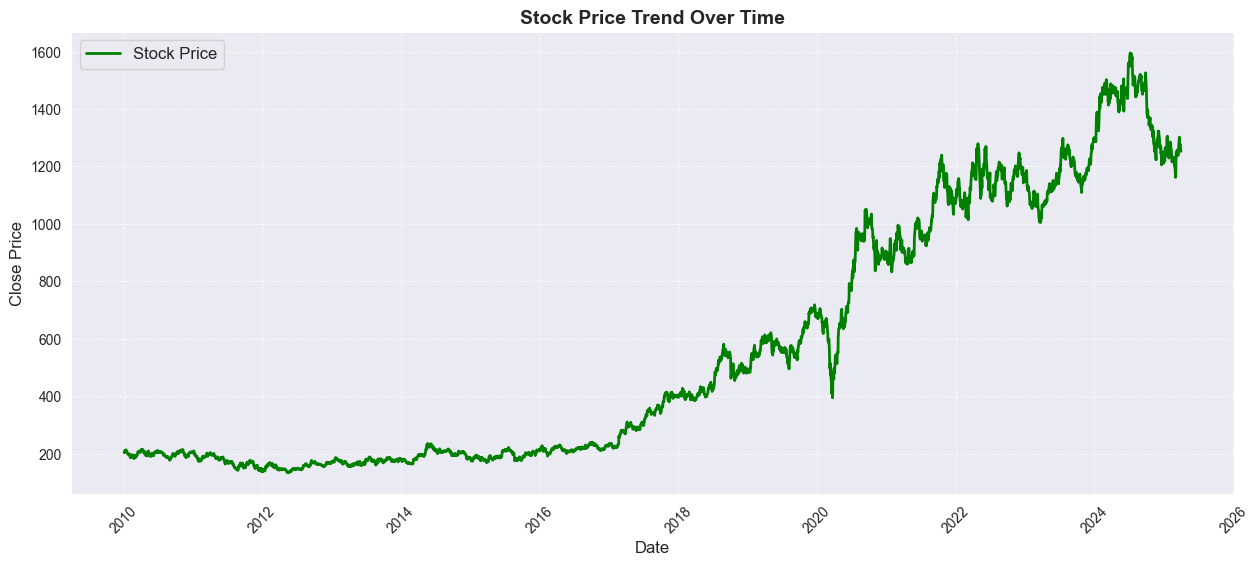

In [9]:


# Set plot style
sns.set_style("darkgrid")  # Makes the plot visually appealing
plt.figure(figsize=(15, 6))  # Adjust figure size

# Create the Seaborn line plot
sns.lineplot(x=df["Date"], y=df['Close'], label="Stock Price", color='green', linewidth=2)

# Customize the plot
plt.xlabel("Date", fontsize=12)  # X-axis label
plt.ylabel("Close Price", fontsize=12)  # Y-axis label
plt.title("Stock Price Trend Over Time", fontsize=14, fontweight='bold')  # Title
plt.legend(loc="upper left", fontsize=12)  # Legend placement
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add a subtle grid

# Show the plot
plt.show()


# Forecasting usinf Facebook Prophet And Testing Accuracy



In [8]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for Prophet
df_prophet = df.rename(columns={"Date": "ds", "Close": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])  # Ensure datetime format

# Split into train (80%) and test (20%) set
train_size = int(0.85 * len(df_prophet))
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]

# Initialize and fit Prophet model
model = Prophet()
model.fit(train)

# Create future dataframe for the test period
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Extract only forecasted values matching test set dates
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test):]

# Calculate accuracy metrics
mae = mean_absolute_error(test['y'].values, forecast_test['yhat'].values)
mse = mean_squared_error(test['y'].values, forecast_test['yhat'].values)
rmse = mse ** 0.5
mape = (abs(test['y'].values - forecast_test['yhat'].values) / test['y'].values).mean() * 100

# Print accuracy metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


19:05:32 - cmdstanpy - INFO - Chain [1] start processing
19:05:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 135.36
Mean Squared Error (MSE): 26196.67
Root Mean Squared Error (RMSE): 161.85
Mean Absolute Percentage Error (MAPE): 11.25%


Interpreting the Results
Lower values of MAE, MSE, and RMSE indicate better model performance.

Lower MAPE (%) means the model is making accurate percentage predictions.

MAPE < 10% → Excellent

MAPE 10-20% → Good

MAPE 20-50% → Acceptable

MAPE > 50% → Poor

In [9]:

# Prepare data for Prophet
df_prophet = df.rename(columns={"Date": "ds", "Close": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])  # Ensure datetime format

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe for the next 30 days
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)




# Show the predicted values for the next 30 days
print(forecast[['ds', 'yhat']].tail(30))


19:06:19 - cmdstanpy - INFO - Chain [1] start processing
19:06:20 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat
3762 2025-03-29  1336.150098
3763 2025-03-30  1395.359056
3764 2025-03-31  1385.440129
3765 2025-04-01  1387.675584
3766 2025-04-02  1388.471851
3767 2025-04-03  1389.851360
3768 2025-04-04  1390.603723
3769 2025-04-05  1344.934122
3770 2025-04-06  1403.953714
3771 2025-04-07  1393.805477
3772 2025-04-08  1395.777966
3773 2025-04-09  1396.283476
3774 2025-04-10  1397.349729
3775 2025-04-11  1397.770927
3776 2025-04-12  1351.756079
3777 2025-04-13  1410.419349
3778 2025-04-14  1399.905916
3779 2025-04-15  1401.505768
3780 2025-04-16  1401.631939
3781 2025-04-17  1402.312307
3782 2025-04-18  1402.340786
3783 2025-04-19  1355.925804
3784 2025-04-20  1414.180829
3785 2025-04-21  1403.250403
3786 2025-04-22  1404.424112
3787 2025-04-23  1404.115000
3788 2025-04-24  1404.351511
3789 2025-04-25  1403.928821
3790 2025-04-26  1357.057418
3791 2025-04-27  1414.853694


In [92]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,27.425429,11.890777,41.476777,27.425429,27.425429,-1.025797,-1.025797,-1.025797,0.701407,0.701407,0.701407,-1.727204,-1.727204,-1.727204,0.0,0.0,0.0,26.399632
1,2010-01-05,27.420410,11.963390,40.309245,27.420410,27.420410,-0.786885,-0.786885,-0.786885,0.941409,0.941409,0.941409,-1.728294,-1.728294,-1.728294,0.0,0.0,0.0,26.633525
2,2010-01-06,27.415391,11.141380,40.769261,27.415391,27.415391,-1.060534,-1.060534,-1.060534,0.663883,0.663883,0.663883,-1.724417,-1.724417,-1.724417,0.0,0.0,0.0,26.354857
3,2010-01-07,27.410373,11.581156,42.292685,27.410373,27.410373,-0.915630,-0.915630,-0.915630,0.799491,0.799491,0.799491,-1.715122,-1.715122,-1.715122,0.0,0.0,0.0,26.494742
4,2010-01-08,27.405354,11.684024,41.649238,27.405354,27.405354,-1.060309,-1.060309,-1.060309,0.639731,0.639731,0.639731,-1.700040,-1.700040,-1.700040,0.0,0.0,0.0,26.345045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,2025-04-23,162.495214,150.251908,178.949231,162.495214,162.495214,2.000312,2.000312,2.000312,0.663883,0.663883,0.663883,1.336430,1.336430,1.336430,0.0,0.0,0.0,164.495526
3788,2025-04-24,162.589947,150.972711,178.406744,162.589947,162.589947,2.050704,2.050704,2.050704,0.799491,0.799491,0.799491,1.251213,1.251213,1.251213,0.0,0.0,0.0,164.640651
3789,2025-04-25,162.684680,149.327049,177.990798,162.684680,162.684680,1.801885,1.801885,1.801885,0.639731,0.639731,0.639731,1.162155,1.162155,1.162155,0.0,0.0,0.0,164.486565
3790,2025-04-26,162.779413,135.221150,162.592557,162.779413,162.779413,-14.499135,-14.499135,-14.499135,-15.570304,-15.570304,-15.570304,1.071170,1.071170,1.071170,0.0,0.0,0.0,148.280278


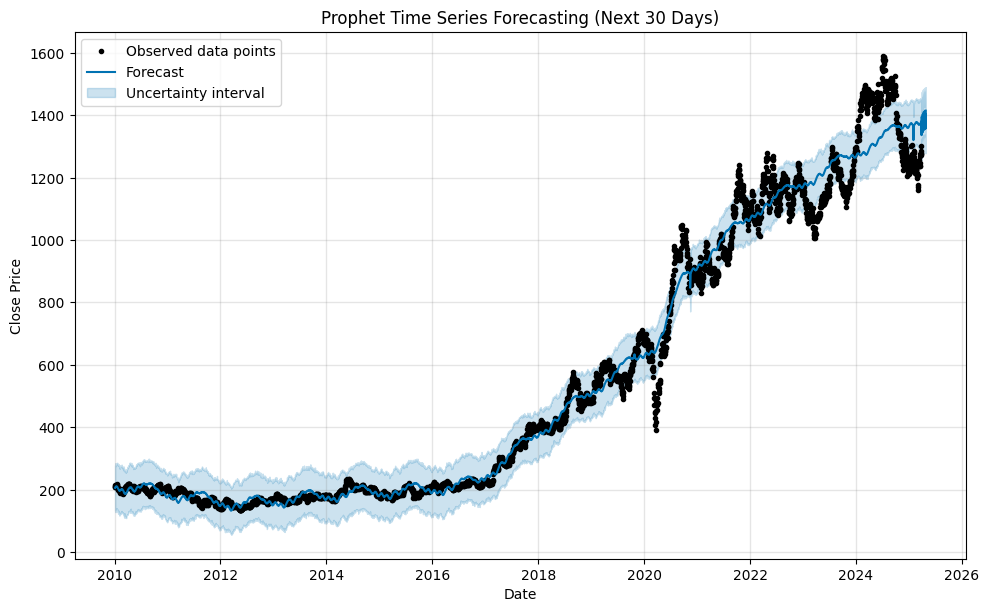

In [10]:
# Plot the forecast
fig = model.plot(forecast)
plt.title("Prophet Time Series Forecasting (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [ ]:
# Making a new dataframe called result 
result = forecast[['ds', 'yhat']].tail(30)

In [12]:
result

,ds,yhat
3762,2025-03-29,1336.150098
3763,2025-03-30,1395.359056
3764,2025-03-31,1385.440129
3765,2025-04-01,1387.675584
3766,2025-04-02,1388.471851
3767,2025-04-03,1389.851360
3768,2025-04-04,1390.603723
3769,2025-04-05,1344.934122
3770,2025-04-06,1403.953714
3771,2025-04-07,1393.805477


# Trying for another Company

In [11]:
x = datetime.datetime.now()
x = x.strftime("%Y-%m-%d")
    
nifty50 = yf.Ticker('KOTAKBANK.NS')
df = nifty50.history(start= '2010-01-01', end=x)

df = df.reset_index()
df['Date'] = df["Date"].dt.date

df = df[['Date',"Close"]]

In [12]:
df

,Date,Close
0,2010-01-04,203.451767
1,2010-01-05,205.466751
2,2010-01-06,207.963821
3,2010-01-07,210.300232
4,2010-01-08,209.002213
...,...,...
3758,2025-03-25,2170.000000
3759,2025-03-26,2144.899902
3760,2025-03-27,2128.649902
3761,2025-03-28,2171.199951


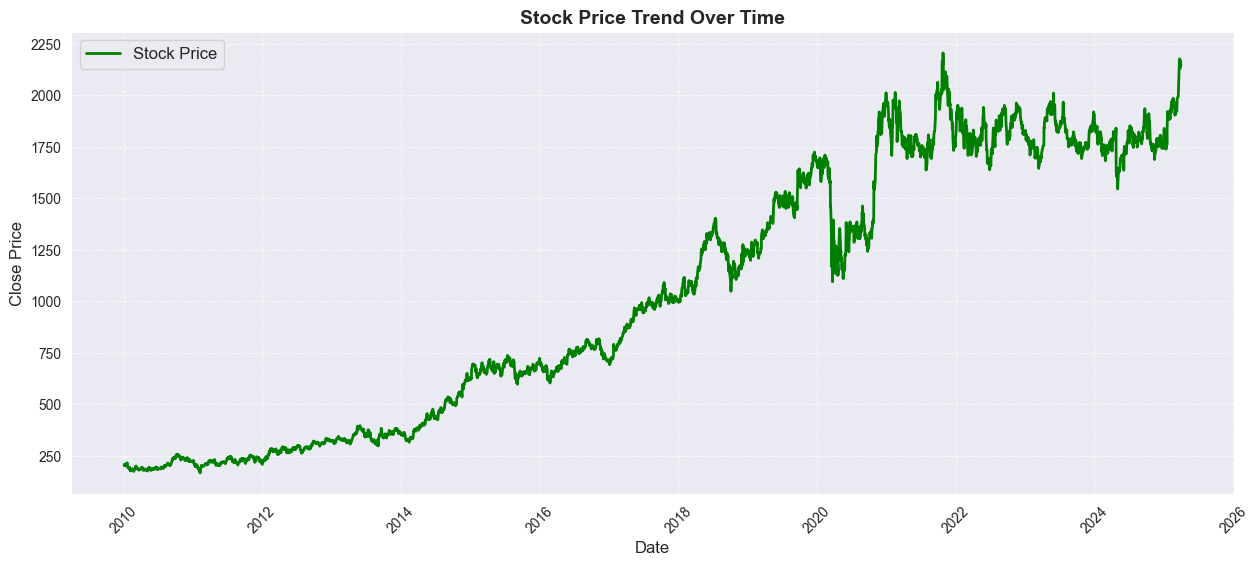

In [13]:
# Set plot style
sns.set_style("darkgrid")  # Makes the plot visually appealing
plt.figure(figsize=(15, 6))  # Adjust figure size

# Create the Seaborn line plot
sns.lineplot(x=df["Date"], y=df['Close'], label="Stock Price", color='green', linewidth=2)

# Customize the plot
plt.xlabel("Date", fontsize=12)  # X-axis label
plt.ylabel("Close Price", fontsize=12)  # Y-axis label
plt.title("Stock Price Trend Over Time", fontsize=14, fontweight='bold')  # Title
plt.legend(loc="upper left", fontsize=12)  # Legend placement
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add a subtle grid

# Show the plot
plt.show()

In [16]:
from prophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for Prophet
df_prophet = df.rename(columns={"Date": "ds", "Close": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])  # Ensure datetime format

# Split into train (80%) and test (20%) set
train_size = int(0.70 * len(df_prophet))
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]

# Initialize and fit Prophet model
model = Prophet()
model.fit(train)

# Create future dataframe for the test period
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Extract only forecasted values matching test set dates
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test):]

# Calculate accuracy metrics
mae = mean_absolute_error(test['y'].values, forecast_test['yhat'].values)
mse = mean_squared_error(test['y'].values, forecast_test['yhat'].values)
rmse = mse ** 0.5
mape = (abs(test['y'].values - forecast_test['yhat'].values) / test['y'].values).mean() * 100

# Print accuracy metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

22:57:41 - cmdstanpy - INFO - Chain [1] start processing
22:57:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 153.57
Mean Squared Error (MSE): 37213.20
Root Mean Squared Error (RMSE): 192.91
Mean Absolute Percentage Error (MAPE): 8.41%


In [17]:
# Prepare data for Prophet
df_prophet = df.rename(columns={"Date": "ds", "Close": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])  # Ensure datetime format

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_prophet)

# Create future dataframe for the next 30 days
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)




# Show the predicted values for the next 30 days
print(forecast[['ds', 'yhat']].tail(30))

22:58:31 - cmdstanpy - INFO - Chain [1] start processing
22:58:33 - cmdstanpy - INFO - Chain [1] done processing


             ds         yhat
3763 2025-04-02  1772.423383
3764 2025-04-03  1773.304614
3765 2025-04-04  1771.937506
3766 2025-04-05  1896.664998
3767 2025-04-06  1822.403807
3768 2025-04-07  1770.962666
3769 2025-04-08  1771.731339
3770 2025-04-09  1771.634092
3771 2025-04-10  1773.217455
3772 2025-04-11  1772.532423
3773 2025-04-12  1897.904693
3774 2025-04-13  1824.234404
3775 2025-04-14  1773.314935
3776 2025-04-15  1774.522439
3777 2025-04-16  1774.769802
3778 2025-04-17  1776.594833
3779 2025-04-18  1776.042815
3780 2025-04-19  1901.437012
3781 2025-04-20  1827.678579
3782 2025-04-21  1776.565426
3783 2025-04-22  1777.481723
3784 2025-04-23  1777.351707
3785 2025-04-24  1778.727616
3786 2025-04-25  1777.671898
3787 2025-04-26  1902.527258
3788 2025-04-27  1828.216053
3789 2025-04-28  1776.558562
3790 2025-04-29  1776.961835
3791 2025-04-30  1776.372838
3792 2025-05-01  1777.365687
